# DEEP LEARNING IMAGE CLASSIFICATION PROJECT 01
## PROJECT COUNT: 05.1

# Image classification using CNN (CIFAR10 dataset) 

# BEST MEDIUM ARTICLE FOR CONVULUTIONAL NEURAL NETWORK [READ THIS FIRTST LATER SEE OTHER WHILE RIVISION]
https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148


In [2]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np



In [3]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.cifar10.load_data()


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5] #the array is in 2 dimensional 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
# converting the 2 dimensional array to one dimension if you donw wanna resjape the dimenson use -1 
y_train=y_train.reshape(-1,)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test.shape

(10000, 1)

In [11]:
x_train[0][0].shape

(32, 3)

In [12]:
x_train[0].shape


(32, 32, 3)

In [13]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [14]:
classes[9]

'truck'

In [15]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

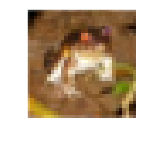

In [16]:
plot_sample(x_train,y_train,0)

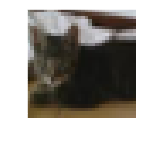

In [17]:
plot_sample(x_train,y_train,9)


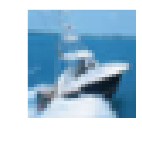

In [18]:
plot_sample(x_train,y_train,8)


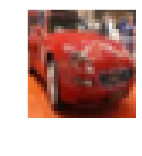

In [19]:
plot_sample(x_train,y_train,5)


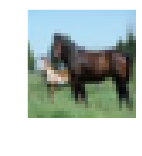

In [20]:
plot_sample(x_train,y_train,12)


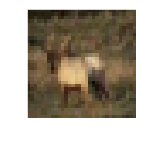

In [21]:
plot_sample(x_train,y_train,3)


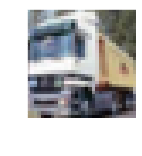

In [22]:
plot_sample(x_train,y_train,1)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### normalisatrion

In [23]:
x_train=x_train/255 
x_test=x_test/255

### Build simple artificial neural network for image classification

In [24]:
ann=models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-18 00:50:50.816914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-18 00:50:50.821617: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### In previous [gpu benchmark with image clasification exerceie we used {'categorical_crossentropy'} function as loss function] becuase in the previous dataset we converted the y values into cateorical values so we wont use it  here we are directly using the y values so we will use f{sparse_categorical_crossentropy}.


In [25]:
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
ann.fit (x_train,y_train,epochs=20)

2022-08-18 00:50:53.911026: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-18 00:50:53.929732: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-08-18 00:50:54.375763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.8436 - accuracy: 0.3269
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6911 - accuracy: 0.3901
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6252 - accuracy: 0.4167
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5709 - accuracy: 0.4343
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5297 - accuracy: 0.4500
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5023 - accuracy: 0.4583
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4786 - accuracy: 0.4665
Epoch 8/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4535 - accuracy: 0.4750
Epoch 9/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4324 - accuracy: 0.4814
Epoch 10/20
1563/1563 [==============================] - 15s 10ms/step - loss

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

2022-08-18 00:56:28.645456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.53      0.50      1000
           1       0.61      0.53      0.57      1000
           2       0.37      0.30      0.33      1000
           3       0.30      0.32      0.31      1000
           4       0.47      0.38      0.42      1000
           5       0.37      0.40      0.38      1000
           6       0.49      0.54      0.51      1000
           7       0.60      0.45      0.51      1000
           8       0.48      0.70      0.57      1000
           9       0.52      0.52      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



## Now let us build a convolutional neural network to train our images

see the image carefullly and follow the steps of image and get the idea
![img](CNN1.png)

In [28]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])

In [29]:
tf.__version__

'2.5.0'

In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [31]:

cnn.fit(x_train, y_train, epochs=1)

2022-08-18 00:56:36.294747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 21s 13ms/step - loss: 1.4612 - accuracy: 0.4741


In [32]:
from keras.layers.convolutional import Conv2D

In [33]:
"""
    from tensorflow import keras


    model_cnn=keras.Sequential([


        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(10,activatinon='softmax')



    ])
"""

"\n    from tensorflow import keras\n\n\n    model_cnn=keras.Sequential([\n\n\n        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),\n        keras.layers.MaxPooling2D((2,2)),\n        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),\n        keras.layers.MaxPooling2D((2,2)),\n\n        keras.layers.Flatten(),\n        keras.layers.Dense(64,activation='relu'),\n        keras.layers.Dense(10,activatinon='softmax')\n\n\n\n    ])\n"

In [34]:
cnn.evaluate(x_test,y_test)


 15/313 [>.............................] - ETA: 2s - loss: 1.2924 - accuracy: 0.5375

2022-08-18 00:56:57.990799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 7ms/step - loss: 1.2255 - accuracy: 0.5632


[1.2255240678787231, 0.5631999969482422]

In [35]:
y_pred=cnn.predict(x_test)

2022-08-18 00:57:00.665931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [36]:
y_pred[:5]

array([[1.96810942e-02, 5.53867081e-04, 3.89838926e-02, 6.52781546e-01,
        6.87487517e-03, 1.67345047e-01, 5.59792109e-02, 4.93479474e-03,
        4.30208668e-02, 9.84485447e-03],
       [1.09995037e-01, 5.74741289e-02, 3.07041948e-04, 4.85405653e-05,
        1.07810978e-04, 8.30221552e-07, 2.68250915e-06, 3.38779000e-06,
        8.22660565e-01, 9.40006133e-03],
       [1.19309507e-01, 8.46271813e-02, 5.20625617e-03, 7.18158949e-03,
        2.97280378e-03, 7.51341053e-04, 5.17037523e-04, 6.27663452e-04,
        7.40489542e-01, 3.83171886e-02],
       [2.90999502e-01, 2.56230757e-02, 6.27516722e-03, 2.41900072e-03,
        2.41375528e-03, 1.05833242e-04, 6.84975588e-04, 4.11449204e-04,
        6.58957422e-01, 1.21099595e-02],
       [8.98545492e-04, 1.17003941e-03, 1.38317481e-01, 1.06290944e-01,
        5.84837973e-01, 4.99504209e-02, 1.08480610e-01, 7.56512256e-03,
        9.85292369e-04, 1.50354288e-03]], dtype=float32)

In [37]:
y_class=[np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 8, 4]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

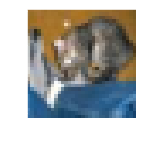

In [39]:
plot_sample(x_test,y_class,0)

In [40]:
classes[y_class[0]]

'cat'

In [41]:
## it predicted correct.

In [43]:
#plot_sample(x_test,y_test,3)

In [44]:
classes[y_class[3]]


'ship'

In [45]:
### our model predicted correctly.

# improved cnn model

In [46]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
# from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator